In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from glob import glob
import json

In [8]:
all_results = [] # index 1 corresponds with experiment 1, index 2 with exp2, etc

for exp in ['exp1','exp2', 'exp3', 'exp4', 'exp5', 'exp6']:

    exp_df = pd.DataFrame()

    for fname in glob(f'./results/{exp}*.json'):
        with open(fname, 'r') as f:
            results = json.load(f)['results']
            
            for result in results:

                result_dict = {}
                result_dict["macro_avg_f1_score"] = [result["report"]["macro avg"]["f1-score"]]
                result_dict["weighted_avg_f1_score"] = [result["report"]["weighted avg"]["f1-score"]]
                result.pop('report')
                for k, v in result.pop('classifier_params').items():
                    result_dict[k] = [v]
                
                for k, v in result.pop('vectorizer_params').items():
                    result_dict[k] = [v]

                for k, v in result.items():
                    result_dict[k] = [v]
                
                exp_df = pd.concat([exp_df, pd.DataFrame(result_dict)], sort=False, ignore_index=True).fillna(0)   

    all_results.append(exp_df)         


C:\Users\rooty\AppData\Local\Temp\ipykernel_5144\3987644233.py:26: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  exp_df = pd.concat([exp_df, pd.DataFrame(result_dict)], sort=False, ignore_index=True).fillna(0)
C:\Users\rooty\AppData\Local\Temp\ipykernel_5144\3987644233.py:26: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  exp_df = pd.concat([exp_df, pd.DataFrame(result_dict)], sort=False, ignore_index=True).fillna(0)
C:\Users\rooty\AppData\Local\Temp\ipykernel_5144\3987644233.py:26: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill

In [131]:
all_results[5]

,macro_avg_f1_score,weighted_avg_f1_score,learning_rate,n_estimators,rsm,depth,ngram_range,preprocessor,max_df,vectorizer,val_f1_macro_mean,val_f1_weighted_mean,drop_in_f1_macro_mean,drop_in_f1_weighed_mean,colsample_bytree,max_depth
0,0.401892,0.658738,0.100,148,0.75,6.0,"[1, 3]",0,0.5,CountVectorizer,0.615708,0.708859,0.213816,0.050121,0.0,0.0
1,0.466529,0.751789,0.100,117,0.75,6.0,"[1, 3]",SnowballStemmer,0.5,CountVectorizer,0.613851,0.705908,0.147322,-0.045881,0.0,0.0
2,0.434489,0.703367,0.100,159,0.75,6.0,"[1, 1]",SnowballStemmer,0.9,CountVectorizer,0.613478,0.704033,0.178989,0.000667,0.0,0.0
3,0.453261,0.734383,0.100,84,1.00,6.0,"[1, 1]",0,0.9,CountVectorizer,0.613366,0.704986,0.160105,-0.029396,0.0,0.0
4,0.431089,0.702235,0.100,174,0.75,6.0,"[1, 3]",SnowballStemmer,0.9,CountVectorizer,0.613299,0.705349,0.182210,0.003114,0.0,0.0
5,0.394636,0.648857,0.100,81,0.75,6.0,"[1, 1]",0,0.5,CountVectorizer,0.613169,0.705973,0.218533,0.057116,0.0,0.0
6,0.439676,0.711777,0.100,164,1.00,6.0,"[1, 1]",SnowballStemmer,0.9,CountVectorizer,0.612545,0.703242,0.172869,-0.008535,0.0,0.0
7,0.449007,0.727135,0.100,90,1.00,6.0,"[1, 1]",SnowballStemmer,0.5,CountVectorizer,0.612423,0.701271,0.163416,-0.025864,0.0,0.0
8,0.408578,0.668161,0.100,103,1.00,10.0,"[1, 3]",0,0.5,CountVectorizer,0.612405,0.707237,0.203827,0.039076,0.0,0.0
9,0.411522,0.672277,0.100,125,1.00,10.0,"[1, 3]",0,0.9,CountVectorizer,0.611953,0.705008,0.200431,0.032730,0.0,0.0


In [122]:
macro_mean_drop_df = pd.DataFrame()

for i, exp_df in enumerate(all_results):
    macro_mean_drop_df = pd.concat([macro_mean_drop_df, exp_df["drop_in_f1_macro_mean"]], axis=1)
macro_mean_drop_df.columns = ['Exp 1', 'Exp 2', 'Exp 3', 'Exp 4', 'Exp 5', 'Exp 6']

In [49]:
macro_mean_drop_df


,Exp 1,Exp 2,Exp 3,Exp 4,Exp 5,Exp 6
0,0.362384,0.173298,0.175380,0.109153,0.178252,0.213816
1,0.362384,0.173298,0.175380,0.109153,0.159636,0.147322
2,0.362833,0.176601,0.169687,0.207979,0.173716,0.178989
3,0.362833,0.176601,0.169687,0.207979,0.162825,0.160105
4,0.365429,0.172062,0.135543,0.240212,0.165856,0.182210
5,0.365429,0.172062,0.135543,0.240212,0.153791,0.218533
6,0.361366,0.172656,0.137269,0.246703,0.166555,0.172869
7,0.361366,0.172656,0.137269,0.246703,0.154615,0.163416
8,0.373885,0.174822,0.153720,0.179996,0.165595,0.203827
9,0.373885,0.174822,0.153720,0.179996,0.173210,0.200431


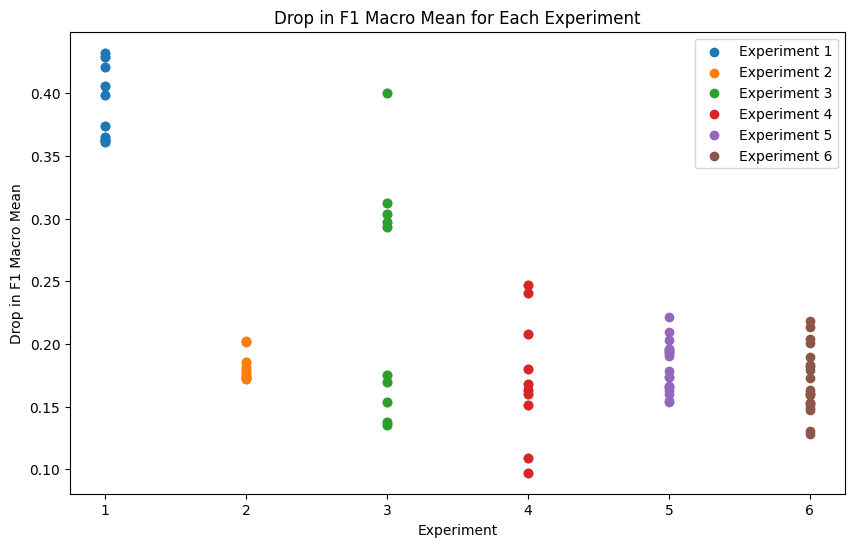

In [14]:
plt.figure(figsize=(10, 6))

for i, exp_df in enumerate(all_results):
    plt.scatter([i+1]*len(exp_df), exp_df['drop_in_f1_macro_mean'], label=f'Experiment {i+1}')

plt.xlabel('Experiment')
plt.ylabel('Drop in F1 Macro Mean')
plt.title('Drop in F1 Macro Mean for Each Experiment')
plt.legend()
plt.show()

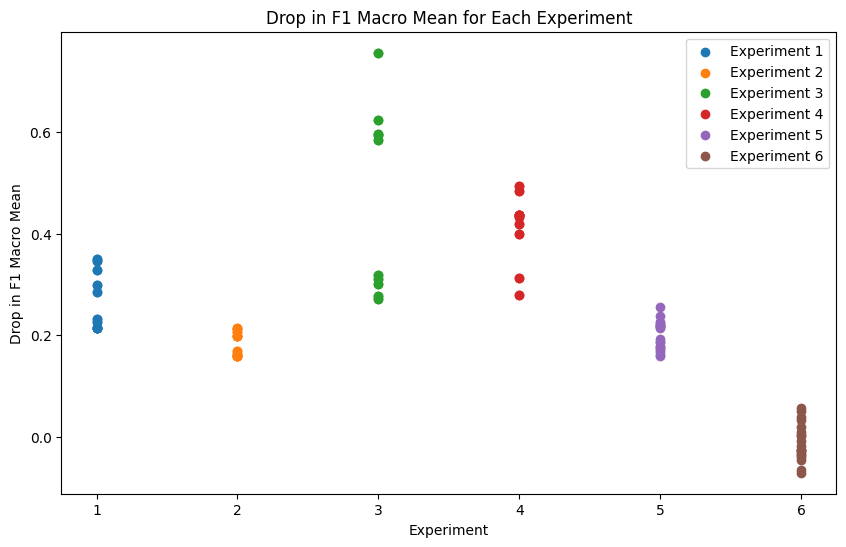

In [24]:
plt.figure(figsize=(10, 6))

for i, exp_df in enumerate(all_results):
    plt.scatter([i+1]*len(exp_df), exp_df['drop_in_f1_weighed_mean'], label=f'Experiment {i+1}')

plt.xlabel('Experiment')
plt.ylabel('Drop in F1 Weighted Mean')
plt.title('Drop in F1 Weighted Mean for Each Experiment')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Drop in F1 Macro Mean')

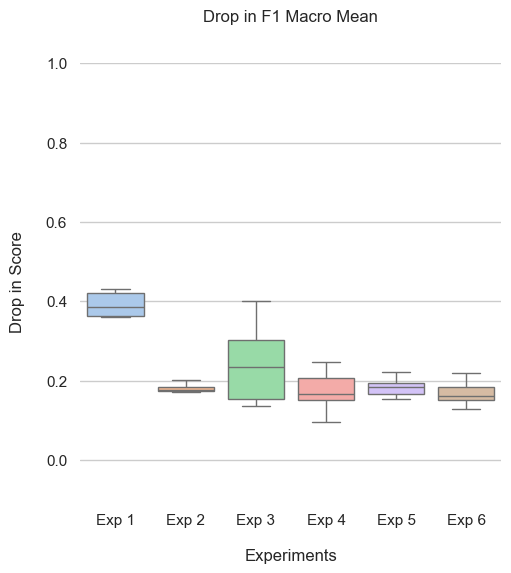

In [140]:
sns.set_theme(style="ticks", palette="pastel")
sns.set_style('whitegrid')

ax = sns.catplot(
    data=macro_mean_drop_df,
    kind="box",
)

ax.set(ylim=(-0.1, 1.0))
sns.despine(offset=0, bottom=True, left=True)
# ax.xaxis.labelpad = 20
# ax.yaxis.labelpad = 20

plt.xlabel("Experiments", labelpad=15)
plt.ylabel("Drop in Score", labelpad=15)
plt.title("Drop in F1 Macro Mean", pad=30)

In [150]:
all_macro_mean_drop = pd.Series()

for col in macro_mean_drop_df.columns:
    all_macro_mean_drop = pd.concat([all_macro_mean_drop, macro_mean_drop_df[col]], axis=0)

C:\Users\rooty\AppData\Local\Temp\ipykernel_5144\3346053482.py:4: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  all_macro_mean_drop = pd.concat([all_macro_mean_drop, macro_mean_drop_df[col]], axis=0)


0     0.362384
1     0.362384
2     0.362833
3     0.362833
4     0.365429
        ...   
15    0.158890
16    0.128172
17    0.152269
18    0.148438
19    0.152563
Length: 120, dtype: float64

In [1]:
sns.set_theme(style="ticks", palette="pastel")
sns.set_style('whitegrid')

ax = sns.catplot(
    all_macro_mean_drop,
    kind='box',
    widths=(.2),  
)

ax.set(ylim=(-0.1, 1.0))
sns.despine(offset=0, bottom=True, left=True)
# ax.xaxis.labelpad = 20
# ax.yaxis.labelpad = 20

plt.xlabel("All Experiments", labelpad=5)
plt.ylabel("Drop in Score", labelpad=15)
plt.title("Drop in F1 Macro Mean", pad=30)

NameError: name 'sns' is not defined

In [133]:
weighted_mean_drop_df = pd.DataFrame()

for i, exp_df in enumerate(all_results):
    weighted_mean_drop_df = pd.concat([weighted_mean_drop_df, exp_df["drop_in_f1_weighed_mean"]], axis=1)
weighted_mean_drop_df.columns = ['Exp 1', 'Exp 2', 'Exp 3', 'Exp 4', 'Exp 5', 'Exp 6']

Text(0.5, 1.0, 'Drop in F1 Weighted Mean')

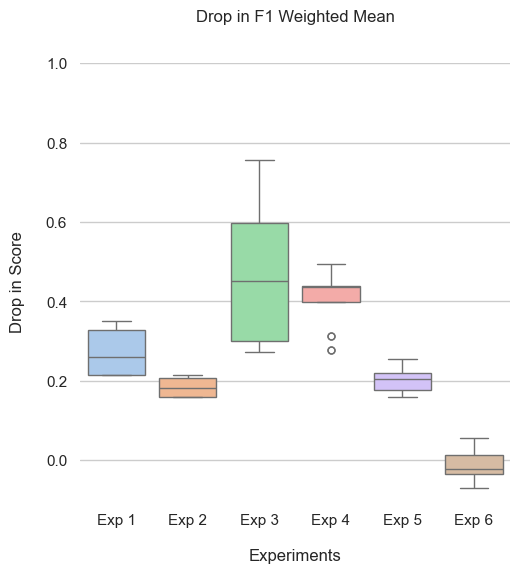

In [139]:
sns.set_theme(style="ticks", palette="pastel")
sns.set_style('whitegrid')

ax = sns.catplot(
    data=weighted_mean_drop_df,
    kind="box",
)

ax.set(ylim=(-0.1, 1.0))
sns.despine(offset=0, bottom=True, left=True)
# ax.xaxis.labelpad = 20
# ax.yaxis.labelpad = 20

plt.xlabel("Experiments", labelpad=15)
plt.ylabel("Drop in Score", labelpad=15)
plt.title("Drop in F1 Weighted Mean", pad=30)